*Contents*
===

- [Trends](#Trends)
    - [Exercise 3.1](#Exercise-3.1)
    - [Linear, quadratic and exponential trend](#Linear,-quadratic-and-exponential-trend) 
- [Decomposition](#Decomposition)
    - [Additive model](#Additive-model)
    - [*seasonal_decompose*](#seasonal_decompose)
- [Forecast](#Forecast)
    - [ARIMA](#ARIMA)
        - [Covariance, correlation and autocorrelation](#Covariance,-correlation-and-autocorrelation)
        - [Correlograms and white noise](#Correlograms-and-white-noise)
        - [Further reading](#Further-reading)
    - [Facebook Prophet](#Facebook-Prophet)
        - [Exercise 3.2](#Exercise-3.2)
- [Extra resources](#Extra-resources)

Trends
---

Let's start by picturing consumption data at a daily frequency.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
plt.rcParams['figure.figsize'] = (15,5)

In [3]:
df = pd.read_csv('../data/OPSD_Germany_all.csv',
                 parse_dates=True,
                 index_col='Date')

df['Weekday'] = df.index.day_name()

df.head()

,Consumption,Wind,Solar,Weekday
Date,,,,
2006-01-01,1069.184,NaN,NaN,Sunday
2006-01-02,1380.521,NaN,NaN,Monday
2006-01-03,1442.533,NaN,NaN,Tuesday
2006-01-04,1457.217,NaN,NaN,Wednesday
2006-01-05,1477.131,NaN,NaN,Thursday


Text(0.5, 1.0, 'Electric energy consumption (GWh)')

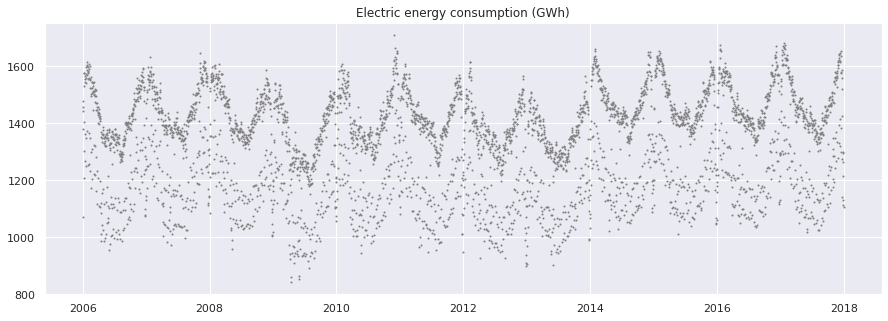

In [4]:
plt.plot(df['Consumption'],
         marker='.',
         markersize=2,
         linestyle='',
         color='gray')
plt.title('Electric energy consumption (GWh)')

As we have seen in the first lesson, Germany's electric energy consumption shows yearly and weekly seasonality.

Let's add the weekly rolling mean to the plot.

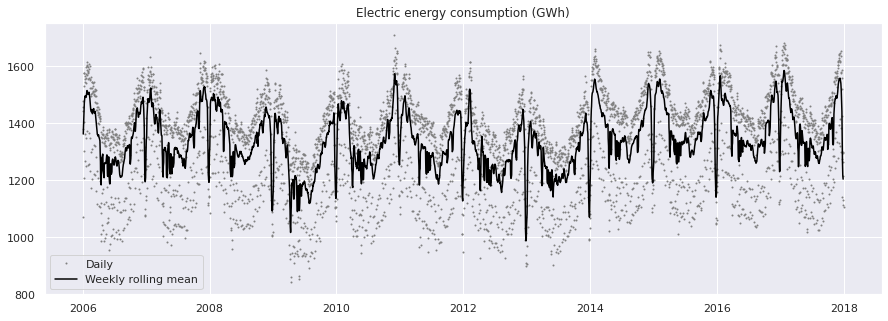

In [5]:
plt.plot(df['Consumption'],
         marker='.',
         markersize=2,
         linestyle='',
         label='Daily',
         color='gray')

plt.plot(df['Consumption'].rolling(7, center=True).mean(),
         label='Weekly rolling mean',
         color='black')

plt.title('Electric energy consumption (GWh)')
plt.legend()

As we expected, the weekly rolling mean cancels the corresponding seasonality. On the other hand yearly seasonality is highlighted, and we can observe:
- the oscillating trend caused by electric heating and increased lighting usage
- negative peaks during winter holidays.

Let's continue the analysis by adding the yearly rolling mean to our plot.

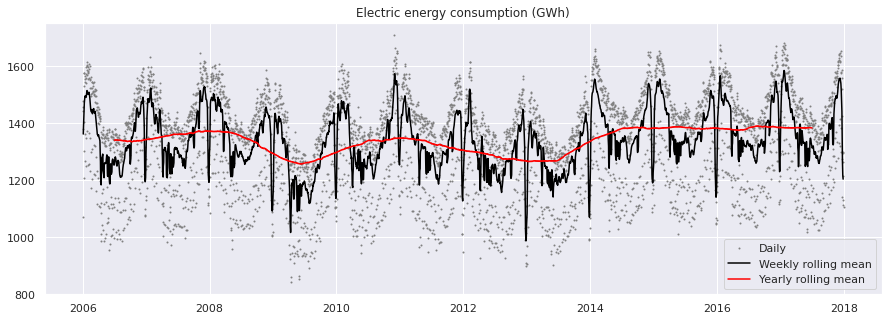

In [6]:
plt.plot(df['Consumption'],
         marker='.',
         markersize=2,
         linestyle='',
         label='Daily',
         color='gray')

plt.plot(df['Consumption'].rolling(7, center=True).mean(),
         label='Weekly rolling mean',
         color='black')

plt.plot(df['Consumption'].rolling(365, center=True).mean(),
         label='Yearly rolling mean',
         color='red')

plt.title('Electric energy consumption (GWh)')
plt.legend()

Once we get rid of a time series' seasonality, what is left is its *long-term trend*.

Well, sort of: we will get back on this later on.

Exercise 3.1
---

Analyse the trend in solar energy production starting from 2012.

Compare, starting from 2006, the trends in
- solar energy production
- wind energy production
- total production of renewable energy.

Linear, quadratic and exponential trend
---

Before moving on, let's make a brief comparison between typical trends. We will generate them synthetically by using NumPy.

In [7]:
import numpy as np

In [8]:
plt.rcParams['figure.figsize'] = (15,3)

A *constant trend* is a horizontal straight line: its rate of growth is zero.

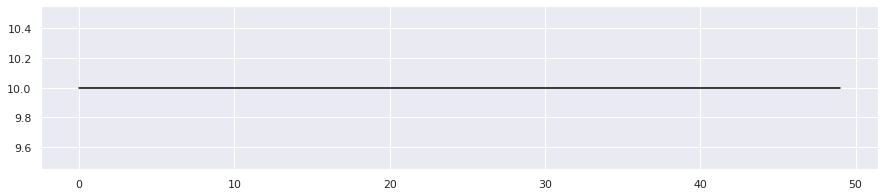

In [9]:
constant_trend = np.array([10 for t in range(50)])
plt.plot(constant_trend, color='black')

A *linear trend* is an inclined straight line: the rate of growth is greater than zero, though it does not change over time.

In [10]:
linear_trend = np.array([5*t for t in range(50)])
linear_trend

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245])

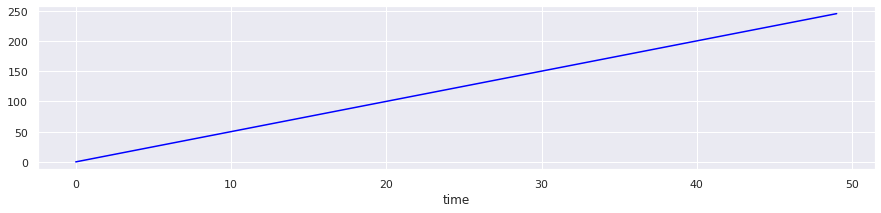

In [11]:
plt.xlabel('time')
plt.plot(linear_trend, color='blue')

A *quadratic trend* (more generally a *polynomial* one) can be compared with a curved line, and its rate of growth does change over time.

In [12]:
quadratic_trend = np.array([t**2 for t in range(50)])
quadratic_trend

array([   0,    1,    4,    9,   16,   25,   36,   49,   64,   81,  100,
        121,  144,  169,  196,  225,  256,  289,  324,  361,  400,  441,
        484,  529,  576,  625,  676,  729,  784,  841,  900,  961, 1024,
       1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849,
       1936, 2025, 2116, 2209, 2304, 2401])

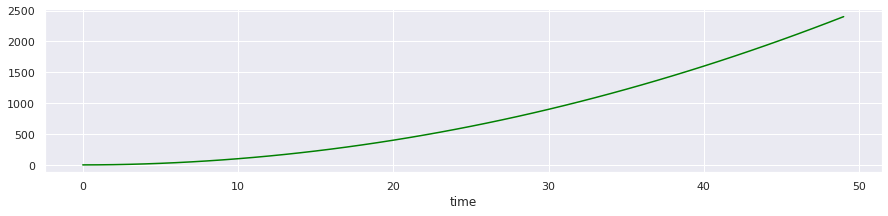

In [13]:
plt.xlabel('time')
plt.plot(quadratic_trend, color='green')

An *exponential trend* is a curved line too, but its rate of growth goes up a lot faster: time is the exponent!

In [14]:
exponential_trend = np.array([2**t for t in range(50)])
exponential_trend

array([              1,               2,               4,               8,
                    16,              32,              64,             128,
                   256,             512,            1024,            2048,
                  4096,            8192,           16384,           32768,
                 65536,          131072,          262144,          524288,
               1048576,         2097152,         4194304,         8388608,
              16777216,        33554432,        67108864,       134217728,
             268435456,       536870912,      1073741824,      2147483648,
            4294967296,      8589934592,     17179869184,     34359738368,
           68719476736,    137438953472,    274877906944,    549755813888,
         1099511627776,   2199023255552,   4398046511104,   8796093022208,
        17592186044416,  35184372088832,  70368744177664, 140737488355328,
       281474976710656, 562949953421312])

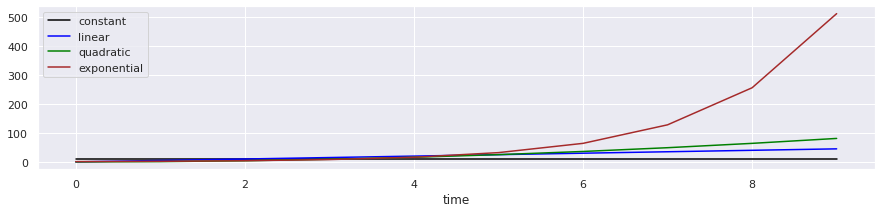

In [15]:
plt.plot(constant_trend[:10], label='constant', color='black')
plt.plot(linear_trend[:10], label='linear', color='blue')
plt.plot(quadratic_trend[:10], label='quadratic', color='green')
plt.plot(exponential_trend[:10], label='exponential', color='brown')

plt.xlabel('time')
plt.legend()

**Recap**: so far we have defined and analysed two of the main components of a time series, namely its seasonality and trend(s). We have also introduced some typical example of trend.

---

Decomposition
===
Let's continue with the concept of *decomposition* of a time series.

Additive model
---

Trend and seasonality are structural, *systematic* components of a time series; that is, they can be analysed and modeled. Another systematic component of a series is the **level**: put simply, its average value. We can think of it as a flat (zero growth) linear trend. 

A time series can then be modeled as:

<h3><center><i>LEVEL + SEASONALITY + TREND + $\epsilon.$</i></center></h3>

<br>

This is called **additive model**, as it is the sum of its terms. $\epsilon$ is called **residual**: the non-systematic component which cannot be straight modeled.

*seasonal_decompose*
---

The *seasonal_decompose* function (*statsmodel* library) allows to decompose a series into its terms.

**Remark**: this is a [naive decomposition](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html), and there are [more sophisticated ones](https://otexts.com/fpp2/decomposition.html). 

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
decomposition = seasonal_decompose(df['Consumption']['2015-01':'2015-06'])

The returned object contains a Pandas series for each of the components.

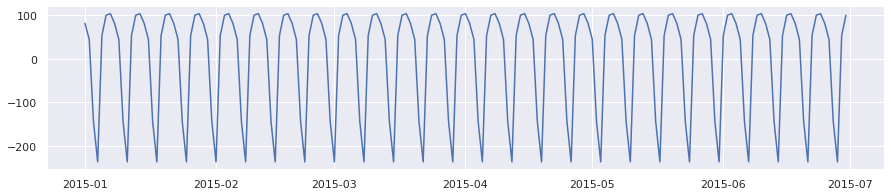

In [18]:
plt.figure(figsize=(15,3))
plt.plot(decomposition.seasonal)

We can also represent all the components in a single plot.

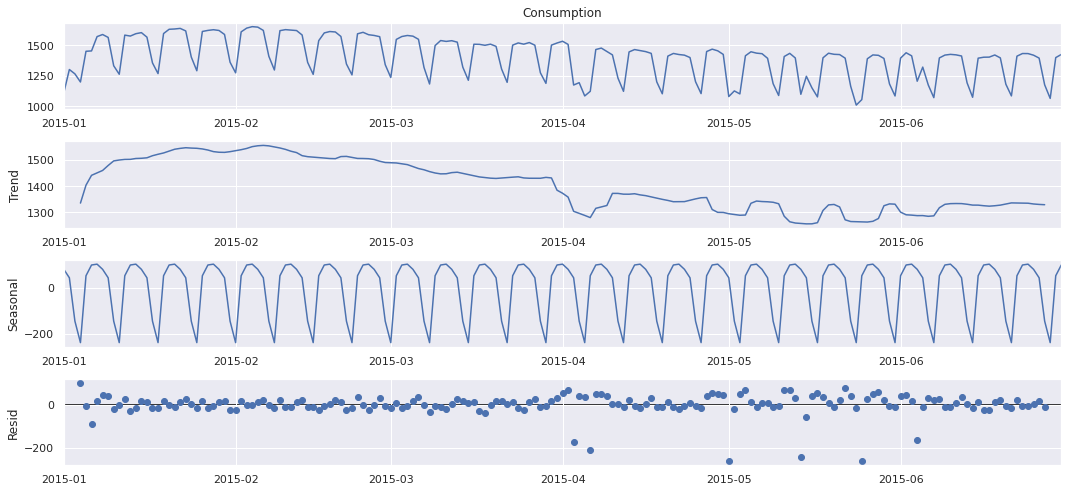

In [19]:
plt.rcParams['figure.figsize'] = (15,7)
plot = decomposition.plot()#avoids repeated plots

**Recap**: an additive time series is the sum of its systematic components (level, trend, seasonality) plus a residual term. 

---

Forecast
===
The analysis of a time series is basic to predict its future.

Forecasting is a hard process, requiring technical, scientific and business skills. There are many predictive models out there, each one coming with its theoretical intuition and a number of parameters to be tuned.

Statistical models such as [ARIMA](https://otexts.com/fpp2/arima.html) are among the most widely used to forecast the future of a signal. ARIMA is a "simple" linear model, though it's highly recommended to spend some time on its statistical properties and mathematical formulation.

Off-the-self forecasting procedures like [Facebook Prophet](https://facebook.github.io/prophet/) are ready to use without knowing too much about their underlying details, and provide a friendly interface.

In the following, I will introduce
- the very first ingredients of ARIMA, providing links for further reading
- Facebook Prophet, with a minimal working example.

ARIMA
---
The main idea behind ARIMA is to describe and learn the *autocorrelation* of a time series.

### Covariance, correlation and autocorrelation

**Covariance** measures how much two random variables (or a bivariate sample) *vary together*. If greater/lower values of one variables correspond to greater/lower values of the other, than the covariance is positive. If it's the opposite, the covariance is negative. 

<br>
$$\large cov_{X,Y} = \frac{\sum\limits_{i=1}^N (x_{i}-\bar{x})(y_{i}-\bar{y})} {N-1}$$
<br>

Hence, the sign of the covariance shows the tendency of the *linear* relationship between the two variables. However, covariance's magnitude is hard to interpret. 

The normalized version of the covariance is called **correlation**; the *correlation coefficient* is a unit-less number between -1 (perfect negative linear relationship) and 1 (perfect positive linear relationship). A correlation (as well as a covariance) of 0 implies no linear relationship.

<br>
$$\large r_{X,Y} = \frac{\sum\limits_{i=1}^N (x_{i}-\bar{x})(y_{i}-\bar{y})} {\sqrt{\sum\limits_{i=1}^N (x_{i}-\bar{x})^2\sum\limits_{i=1}^N (y_{i}-\bar{y})^2}}$$
<br>

The figure below shows examples of the correlation of bivariate data.

<br>
<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png width="700">

<br>

If correlation quantifies the linear relationship between two random variables, [autocorrelation](https://otexts.com/fpp2/autocorrelation.html) measures such relationship *between lagged values of a time series*. That is, between shifted version of the same temporal signal.

$$\large r_{X, k} = \frac{\sum\limits_{t=k+1}^T (x_{t}-\bar{x})(x_{t-k}-\bar{x})}
 {\sum\limits_{t=1}^T (x_{t}-\bar{x})^2}$$

<br>

There is an autocorrelation coefficient for each choice of the lag $k$. For example, $r_1$
measures the linear relationship between $x_t$ and $x_{t−1}$, $r_2$ between $x_t$ and $x_{t−2}$, and so on.

### Correlograms and white noise

A **correlogram** (also known as *ACF*, *autocorrelation function*) plots the autocorrelation coefficients $r_k$ for each lag $k$.

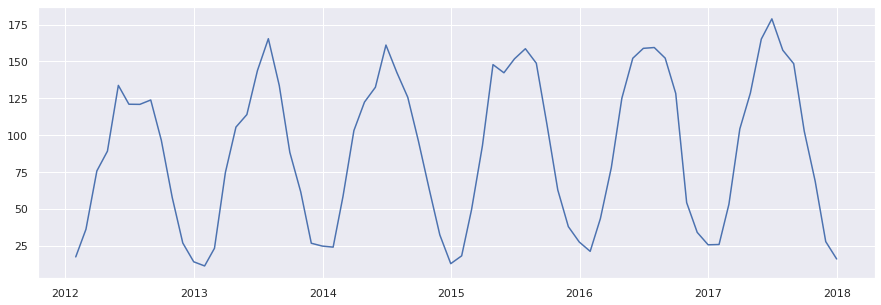

In [20]:
df_solar = df['Solar'].resample('M').mean().dropna()

plt.figure(figsize=(15,5))
plt.plot(df_solar)

In [21]:
from statsmodels.graphics.tsaplots import plot_acf

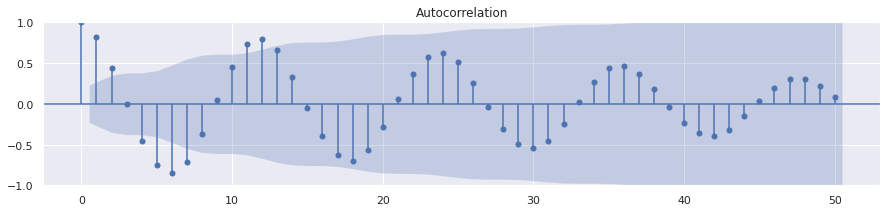

In [22]:
fig, ax = plt.subplots(figsize=(15,3))
_ = plot_acf(df_solar, ax=ax, lags=50)

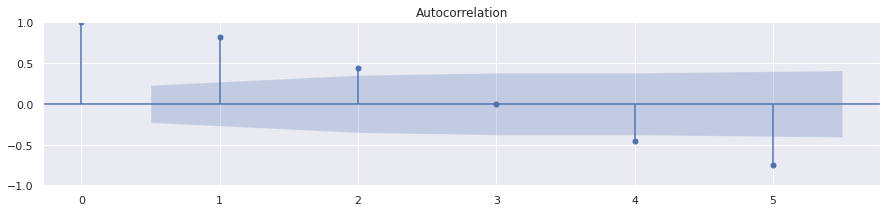

In [23]:
fig, ax = plt.subplots(figsize=(15,3))
_ = plot_acf(df_solar, ax=ax, lags=5)

A few comments on the above plots:
- $r_0$ is the 0-lag autocorrelation; thus, its value is 1
- higher *peaks* are observed at lags multiple of 12; indeed, the seasonality of the series is yearly
- lower *troughs* are six lags (=months) behind peaks
- the (absolute) height of the pins decreases over time, as the signal's correlation with its past gets weaker
- conversely, the blue shadowed area (by default, delimiting a 95% *confidence interval* on the height of the pins) gets larger at higher lags; why? 

**Note**: confidence intervals are among the trickiest stats concepts for a data scientist to grasp. An intuitive (yet not correct) explanation is that a 95% confidence interval for "something" has the 95% probability of containing that "something". For a nicer and exact scientifical explanation, see [here](https://statisticsbyjim.com/hypothesis-testing/confidence-prediction-tolerance-intervals/), [here](https://www.graphpad.com/support/faq/the-distinction-between-confidence-intervals-prediction-intervals-and-tolerance-intervals/) and [here](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/).

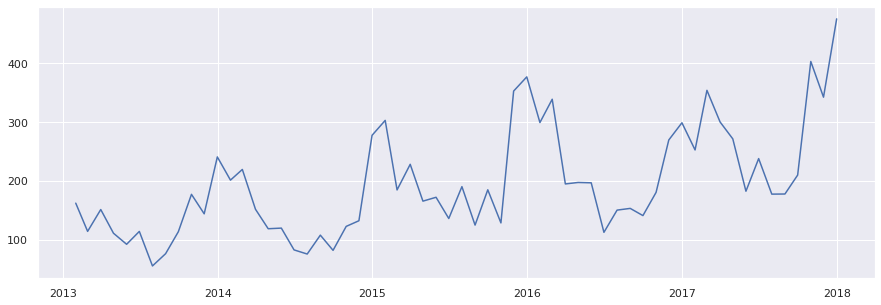

In [24]:
df_wind = df['Wind'].loc['2013':].resample('M').mean().dropna()

plt.figure(figsize=(15,5))
plt.plot(df_wind)

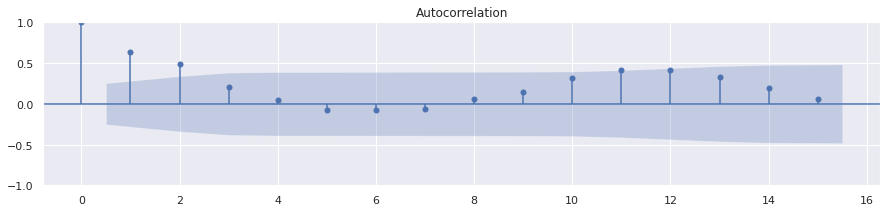

In [25]:
fig, ax = plt.subplots(figsize=(15,3))
_ = plot_acf(df_wind, ax=ax, lags=15)

Though the seasonality of wind energy production is still yearly, this series also shows a strong trend.

This has the effect of "lifting" the first pins of the ACF plot: the autocorrelations for small lags tend to be large and positive, [because observations nearby in time are also nearby in size](https://otexts.com/fpp2/autocorrelation.html#autocorrelation).

<br>

A series that shows no autocorrelation at all is called **white noise**. Copy-pasting [from Wikipedia](https://en.wikipedia.org/wiki/White_noise):

*[...] a sequence of serially uncorrelated random variables with zero mean and finite variance. [...] one may also require that the samples have identical probability distribution. [...] if each sample has a normal distribution with zero mean, the signal is said to be* **additive white Gaussian noise.**

In [26]:
from numpy import random

In [27]:
np.random.seed(0)
np.random.normal(loc=0, scale=1, size=50)

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028])

<AxesSubplot:>

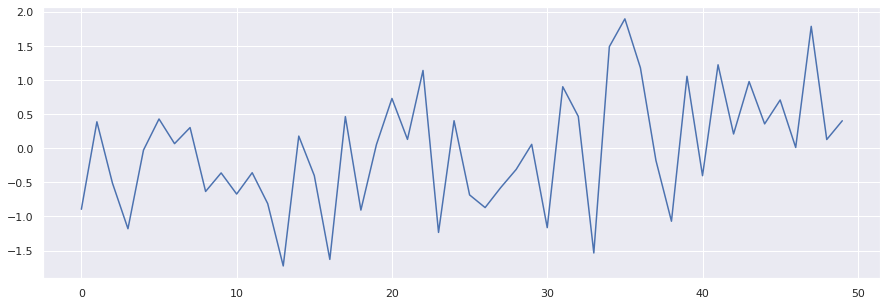

In [28]:
gwn_series = np.random.normal(loc=0, scale=1, size=50)
gwn_series = pd.Series(gwn_series)

fig, ax = plt.subplots(figsize=(15,5))
gwn_series.plot()

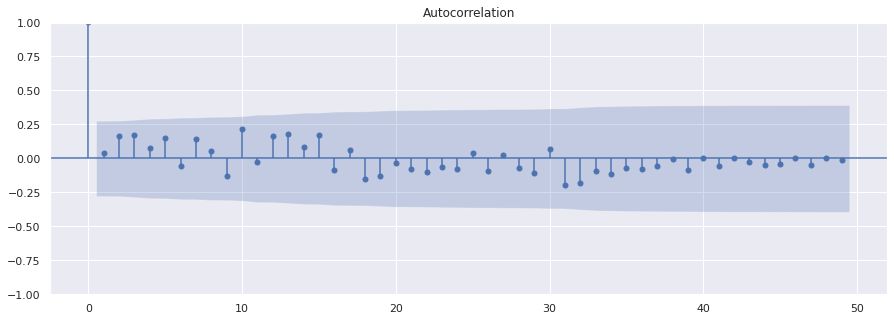

In [29]:
fig, ax = plt.subplots(figsize=(15,5))
_ = plot_acf(gwn_series, ax=ax, lags=49)

### Further reading

[This](https://otexts.com/fpp2/arima.html) and [this](https://people.duke.edu/~rnau/411home.htm) are nice resources you can use to approach ARIMA as well as other models and concepts of statistical forecasting.

In the *Extra resources* section of this notebook you can find the links to two Python implementations of ARIMA.

Facebook Prophet
---
[Prophet](https://facebook.github.io/prophet/) is a forecasting procedure released by Facebook in 2017. Here are some of the features which make it a powerful and versatile tool:

- it is able to handle multiple seasonality and abrupt trend changes
- it is robust to missing data and outliers
- it is fairly out-of-the-box, while at the same time highly customizable.

Let's have a look.

We import the library (and silence Pandas warnings).

In [30]:
import warnings
warnings.filterwarnings('ignore')

from fbprophet import Prophet

We want to predict the electric consumption of 2017, given data from the past.

In [31]:
df = pd.read_csv('../data/OPSD_Germany_consumption.csv',
                 parse_dates=True,
                 index_col='Date')

df.head()

,Consumption
Date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


We split the dataframe into a training and test set.

In [32]:
df_train = df['2006':'2016']
df_test = df['2017']

In [33]:
df_train

,Consumption
Date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131
...,...
2016-12-27,1289.324
2016-12-28,1294.881
2016-12-29,1295.897


In [34]:
df_test

,Consumption
Date,
2017-01-01,1130.41300
2017-01-02,1441.05200
2017-01-03,1529.99000
2017-01-04,1553.08300
2017-01-05,1547.23800
...,...
2017-12-27,1263.94091
2017-12-28,1299.86398
2017-12-29,1295.08753


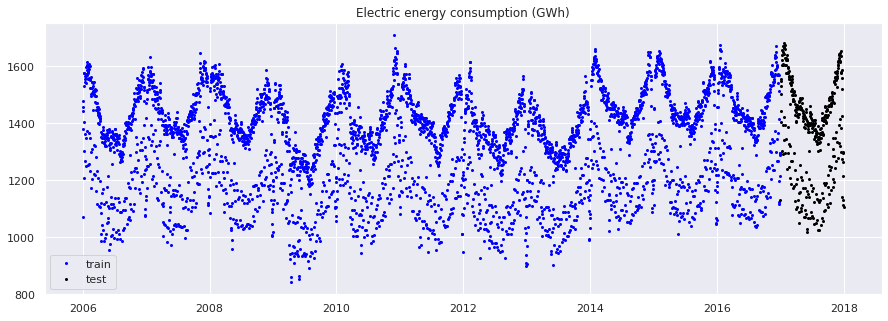

In [35]:
plt.figure(figsize=(15, 5))

plt.plot(df_train,
         marker='.',
         markersize=4,
         linestyle='',
         label='train',
         color='blue')

plt.plot(df_test,
         marker='.',
         markersize=4,
         linestyle='',
         label='test',
         color='black')

plt.title('Electric energy consumption (GWh)')
plt.legend()

Prophet easily works with dataframes, though it requires a specific structure. We need two columns:
- *ds* for the temporal index
- *y*  for the numerical values of the series.

We build the dataframe to pass to Prophet. We use Pandas *reset_index* to turn the temporal index into a standard column.

In [36]:
df_train_prophet = df_train.reset_index()
df_train_prophet

,Date,Consumption
0,2006-01-01,1069.184
1,2006-01-02,1380.521
2,2006-01-03,1442.533
3,2006-01-04,1457.217
4,2006-01-05,1477.131
...,...,...
4013,2016-12-27,1289.324
4014,2016-12-28,1294.881
4015,2016-12-29,1295.897
4016,2016-12-30,1291.044


We rename the columns as required.

In [37]:
df_train_prophet.columns = ['ds', 'y']
df_train_prophet

,ds,y
0,2006-01-01,1069.184
1,2006-01-02,1380.521
2,2006-01-03,1442.533
3,2006-01-04,1457.217
4,2006-01-05,1477.131
...,...,...
4013,2016-12-27,1289.324
4014,2016-12-28,1294.881
4015,2016-12-29,1295.897
4016,2016-12-30,1291.044


We are finally ready for training. Prophet's syntax is similar to that of Scikit-learn.

In [38]:
model = Prophet()
model.fit(df_train_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Let's build the data structure that will contain test predictions.

In [39]:
future = model.make_future_dataframe(periods=365, include_history=False)
future

,ds
0,2017-01-01
1,2017-01-02
2,2017-01-03
3,2017-01-04
4,2017-01-05
...,...
360,2017-12-27
361,2017-12-28
362,2017-12-29
363,2017-12-30


We pass the structure we just built to the *predict* function of the trained Prophet model.

In [40]:
test_predictions = model.predict(future)

A dataframe is returned, containing several columns. The *yhat* column stores the numerical test predictions.

In [41]:
test_predictions.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [42]:
test_predictions['yhat']

0      1070.018801
1      1366.158950
2      1415.089162
3      1431.490704
4      1432.089968
          ...     
360    1384.369430
361    1369.969143
362    1343.681517
363    1153.056808
364    1059.963914
Name: yhat, Length: 365, dtype: float64

We add these predictions to the test set's dataframe.

In [43]:
df_test['Prediction'] = test_predictions['yhat'].values
df_test

,Consumption,Prediction
Date,,
2017-01-01,1130.41300,1070.018801
2017-01-02,1441.05200,1366.158950
2017-01-03,1529.99000,1415.089162
2017-01-04,1553.08300,1431.490704
2017-01-05,1547.23800,1432.089968
...,...,...
2017-12-27,1263.94091,1384.369430
2017-12-28,1299.86398,1369.969143
2017-12-29,1295.08753,1343.681517


Let's compare the actual (test) consumption with that predicted by Prophet.

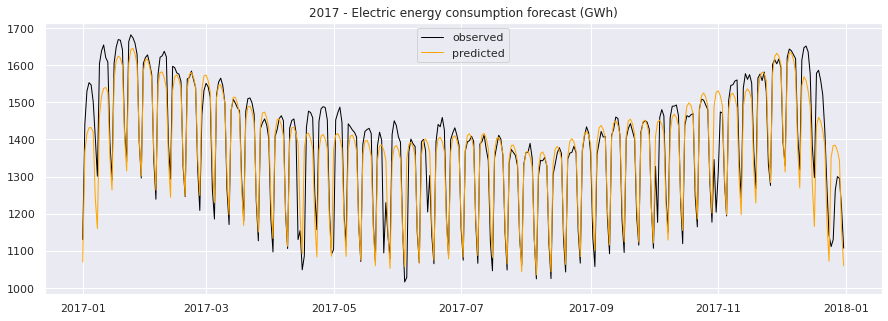

In [44]:
plt.figure(figsize=(15, 5))

plt.plot(df_test['Consumption'],
         linestyle='-',
         color='black',
         linewidth=1,
         label='observed')

plt.plot(df_test['Prediction'],
         linestyle='-',
         linewidth=1,
         color='orange',
         label='predicted')

plt.title('2017 - Electric energy consumption forecast (GWh)')
plt.legend()

**Recap**: so far, we have
- split the data into training and test set
- created the data structure required by Prophet for training and making predictions
- trained a model on the training set
- obtained test predictions
- compared actual and predicted values.

Are we happy enough? What's next?

Like with standard supervised learning, we need to *quantitatively* evaluate our predictions. We therefore need a **metric** to quantify the error made by the trained model. You can have a look [here](https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python) and [here](https://otexts.com/fpp2/accuracy.html#accuracy).

A model has several **hyperparameters** to be tuned, influencing the degree of fitting of training data. In Scikit-learn, these are implemented as arguments to be passed to the model at construction time. The same goes for Prophet.

Among them, we find *changepoint_prior_scale*. A [*changepoint*](https://facebook.github.io/prophet/docs/trend_changepoints.html) is a time instant at which the series abruptly changes its behaviour. By fine-tuning this hyperparameter, we set the model sensitivity to changepoints:

<br>

<img src='../img/changepoints.png' width=400/>

<br>

Seasonality can be looked for or excluded from the model by setting the *daily_*, *weekly_* and *yearly_seasonality* arguments.

The graphical example of this cell is taken from [here](https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a); [this](https://towardsdatascience.com/a-quick-start-of-time-series-forecasting-with-a-practical-example-using-fb-prophet-31c4447a2274) is another useful resource. Finally, [this](https://peerj.com/preprints/3190.pdf) is the original article.

### Exercise 3.2

Forecast and represent the solar energy production of 2017, by using years from 2012 to 2016 as training data.

---

Extra resources
===


<br>

**Python tools**:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html.

<br>

**Autocorrelation vs partial autocorrelation**:
- https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
- https://www.youtube.com/watch?v=ZjaBn93YPWo.

<br>

**Forecast models**:
- https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html
- https://alkaline-ml.com/pmdarima/0.9.0/modules/generated/pyramid.arima.auto_arima.html
- https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
- https://www.youtube.com/watch?v=d4Sn6ny_5LI.

<br>

**Forecast as supervised learning**:
- https://machinelearningmastery.com/time-series-forecasting-supervised-learning/
- https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/.

<br>

**Datasets and notebooks**:
- https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset
- https://machinelearningmastery.com/time-series-datasets-for-machine-learning/
- https://www.kaggle.com/search?q=time+series.

---

<script>
  $(document).ready(function(){
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('div.prompt').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by OVHCloud.
</footer>